# Regularized Linear Models

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

## Load data

We load the Boston data from `sklearn.datasets` and split it into train and test data. As in the last notebook, we generate polynomial features of the second degree. We will work further with `x_train_poly`, `y_train`, `x_test_poly` and `y_test`. 
Run the cell below.

In [2]:
# The data set is originally downloaded from  "http://lib.stat.cmu.edu/datasets/boston".

raw_df = pd.read_csv('../Data/Boston.csv')

y = pd.DataFrame(raw_df['target'])
x = pd.DataFrame(raw_df.iloc[:,1:-1])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
# depending on the version of sklearn, this will cause an error
# in that case, replace "get_feature_names_out" with "get_feature_names"
poly_names = poly.get_feature_names_out()

names_dict = {'x0': X_train.columns[0],
             'x1': X_train.columns[1],
             'x2': X_train.columns[2],
             'x3': X_train.columns[3],
             'x4': X_train.columns[4],
             'x5': X_train.columns[5],
             'x6': X_train.columns[6],
             'x7': X_train.columns[7],
             'x8': X_train.columns[8],
             'x9': X_train.columns[9],
             'x10': X_train.columns[10],
             'x11': X_train.columns[11],
             'x12': X_train.columns[12]
            }

### Exercise

How many features are there in total?

In [3]:
# Task

x_train_poly.shape[1]

105

We will further use the user-defined function `plot_coef` that takes as input coefficients as output of the fitted model. It plots the coefficient values and calculates average.

In [4]:
def plot_coef(lr_coef):
    '''
    The function plots coefficients' values from the linear model.
    --------
    params:
        lr_coef: coefficients as they are returned from the classifier's attributes
    '''
    lr_coef = lr_coef.reshape(-1,1)
    print(f'AVG coef value: {np.mean(lr_coef)}')
    plt.plot(lr_coef)
    plt.title("Coefficients' values")
    plt.show()

## Fit linear regression without regularization

### Exercise

- Instantiate alinear regression under the variable `lr`.
- Fit `lr` to `x_train_poly`, `y_train `.
- Predict with `lr` on `x_train_poly` and store the results to `y_hat_train`.
- Predict with `lr` on `x_test_poly` and store the results to `y_hat_test`.
- Return the RMSE for `y_hat_train` as well as for `y_hat_test`. 

How do you interpret the difference in performance of the model on train and on test dataset? Can you tell if the model overfits/underfits?

In [5]:
# Task


lr = LinearRegression()
lr.fit(x_train_poly, y_train)

y_hat_train = lr.predict(x_train_poly)
y_hat_test = lr.predict(x_test_poly)

print(f"RMSE train: {mean_squared_error(y_train, y_hat_train, squared=False)}")
print(f"RMSE test: {mean_squared_error(y_test, y_hat_test, squared=False)}")

RMSE train: 5.856012454132429
RMSE test: 9.874332189204274


The RMSE is almost twice as big for the test set than for the train set. This suggests overfitting and a poor generalization power of the model.

We use the function `plot_coef` on the coefficients of the fitted model to see the values of the coefficients and the average value of the coefficients.

AVG coef value: -33184342.082189564


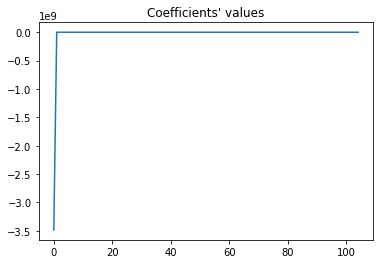

In [6]:
plot_coef(lr.coef_)

The coefficients in combination with the error values on train and test suggest that we deal here with overfitting of the model on the given set of polynomial features. We should therefore use **regularization**. 

## Standardization

Before fitting any regularized model, the scaling of the features is crucial. Otherwise the regularization would not be fair to features of different scales. Regularized linear models assume that the inputs to the model have a zero mean and a variance in the same magnitude. `StandarScaler()` deducts the mean and divides by the standard deviation. 

### Exercise

- Instantiate `StandardScaler()` under the name `scaler`.
- Apply the `fit_transform` method with the input `x_train_poly` to `scaler` and store the result into `x_train_scaled`.
- Once the scaler is fit to `x_train_poly` you can directly transform `x_test_poly` and store it in the variable `X_test_scaled`. You never want to fit on a test sample, because that way information from the test data might leak. Test data serves only for evaluation.

In [7]:
# Task


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_poly)
X_test_scaled = scaler.transform(x_test_poly)

If you applied the standardization correctly you should see on the bottom chart the distributions of all the features concentrated around zero with similar ranges of deviation.

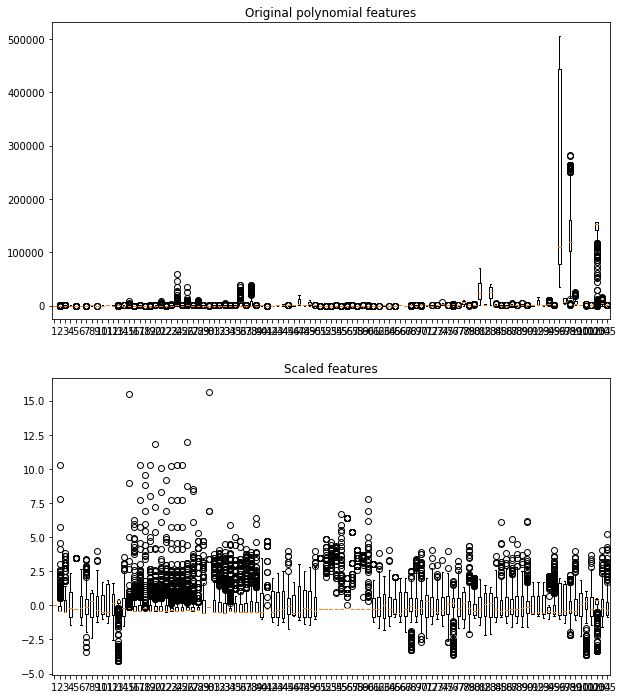

In [17]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.title('Original polynomial features')
plt.boxplot(x_train_poly)

plt.subplot(2,1,2)
plt.title('Scaled features')
plt.boxplot(X_train_scaled)

plt.show()

# Lasso
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Exercise
- Instantiate a Lasso regression under the name `lr_l`.
- Fit the model to `X_train_scaled` and `y_train`.
- Predict on `X_train_scaled` and `X_test_scaled` and store the predictions in `y_hat_train` and `y_hat_test`, respectively.

Did the overfit change?


In [9]:
# Task


from sklearn.linear_model import Lasso

lr_l = Lasso()
lr_l.fit(X_train_scaled, y_train)

y_hat_train = lr_l.predict(X_train_scaled)
y_hat_test = lr_l.predict(X_test_scaled)

print(f"RMSE train: {mean_squared_error(y_train, y_hat_train, squared=False)}")
print(f"RMSE test: {mean_squared_error(y_test, y_hat_test, squared=False)}")

RMSE train: 4.8403450896985785
RMSE test: 4.71451932483926


The performance seems to be comparable on train and test dataset. Hence, the model's generalization power is better now.

### Exercise

Use `plot_coef()` on the coefficients of the lasso model.

AVG coef value: -0.0034975241402784504


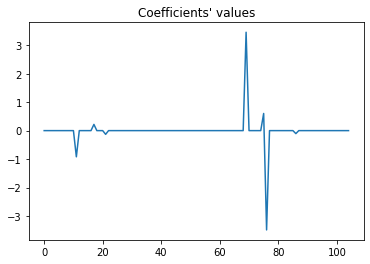

In [10]:
# Task

plot_coef(lr_l.coef_)

The average value of the coefficients is much smaller now. Also, many of the coefficients are equal to 0.

In [11]:
print(f'After applying Lasso on polynomial scaled features we remain with {np.sum(lr_l.coef_!=0)} variables.')
print('\nThe selected variables are:\n')
[print(val) for val in pd.DataFrame(poly_names)[lr_l.coef_!=0].values];
print('\nmapping from polynomial names to original feature names: ')
display(names_dict)

After applying Lasso on polynomial scaled features we remain with 7 variables

The selected variables are:

['PTRATIO']
['CRIM CHAS']
['CRIM DIS']
['RM^2']
['RM B']
['RM LSTAT']
['DIS TAX']

mapping from polynomial names to original feature names: 


{'x0': 'CRIM',
 'x1': 'ZN',
 'x2': 'INDUS',
 'x3': 'CHAS',
 'x4': 'NOX',
 'x5': 'RM',
 'x6': 'AGE',
 'x7': 'DIS',
 'x8': 'RAD',
 'x9': 'TAX',
 'x10': 'PTRATIO',
 'x11': 'B',
 'x12': 'LSTAT'}

### Exercise

- Take the subset of `X_train_scaled` with only those variables that have a non-zero coefficient and store it in the variable `x_train_lasso`
- Do the same selection on `X_test_scaled` and save it to `x_test_lasso`.
- How many variables are remaining? Check it with the cell above.

In [12]:
# Task

x_train_lasso = X_train_scaled[:,lr_l.coef_!=0]
x_test_lasso = X_test_scaled[:,lr_l.coef_!=0]
x_test_lasso.shape[1]

7

## Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

We have effectively performed a feature selection with Lasso. Now we will build on it and use only the selected features in `x_train_lasso` and `x_test_lasso`. 

Let's try different values for the strength of the optimization, alpha. By default it is equal to 1 and it must be a positive value. Larger values specify stronger regularization. Alpha can be set also in Lasso and Elastic Net.

### Exercise
- Fit the ridge regression to `x_train_lasso` and `y_train` with the values of alpha being 0.001, 0.01, 0.1, 1, 10 and 100 to see the effect of the regularization strength.
- Return the RMSE for `x_train_lasso` for each of the alpha options.
- Select the parameter alpha for which the model has the best RMSE.

The lowest RMSE on a train set is 4.39 with the alpha = 0.001


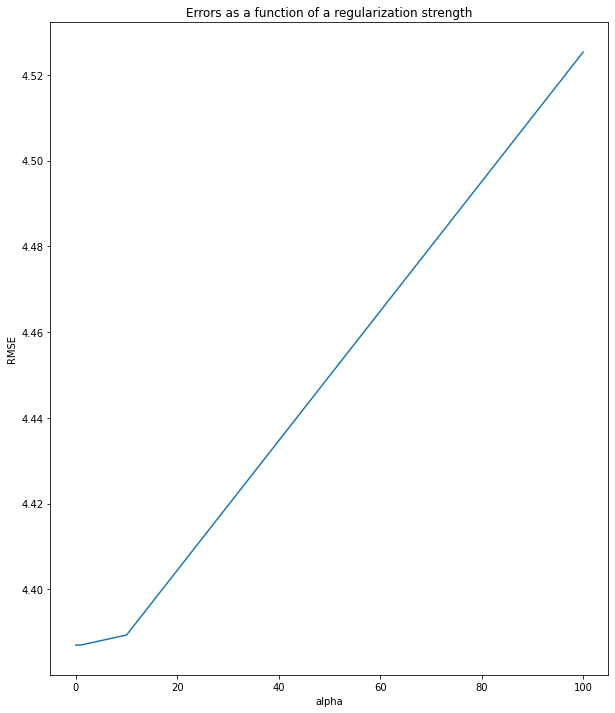

In [18]:
# Task

rmses = []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:    
    lr_r = Ridge(alpha=alpha)
    lr_r.fit(x_train_lasso, y_train)
    y_hat_train = lr_r.predict(x_train_lasso)
    rmses.append(mean_squared_error(y_train, y_hat_train, squared=False))

plt.figure(figsize=(10,12))
plt.title('Errors as a function of a regularization strength')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.plot(alphas, rmses);
print(f'The lowest RMSE on a train set is {np.round(np.min(rmses),2)} with alpha = {alphas[np.argmin(rmses)]}.')

### Exercise
- Fit the model with the best performance on train data.
- Calculate the RMSE on `x_test_lasso` for the best model.

In [14]:
# Task

lr_r_best = Ridge(alpha=alphas[np.argmin(rmses)]).fit(x_train_lasso, y_train)
y_hat_test = lr_r_best.predict(x_test_lasso)
rmse_test = np.round(mean_squared_error(y_test, y_hat_test, squared=False))
print(f"RMSE test: {np.round(rmse_test,2)}")

RMSE test: 5.0


The RMSEs on the train and the test set are similar!

### Exercise
Use the function `plot_coef` on the coefficients from the best model to see the coefficients values with their average.

AVG coef value: -0.2023131418292388


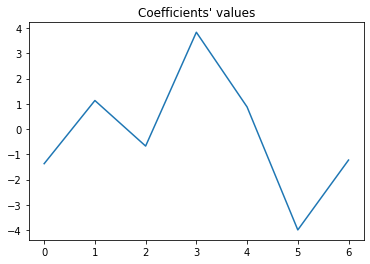

In [15]:
# Task

plot_coef(lr_r_best.coef_)

# Elastic Net

Elastic Net is a combination of Lasso and Ridge which is defined by a parameter `l1_ratio`. If it is equal to 1 the model is equivalent to Lasso, if it is 0 then it is as if we had a Ridge regression. The regularization strength alpha can be defined just as in Ridge or Lasso. 

You can enforce the values of the parameters to be positive with the parameter `positive = True`. Such an option is also available for Lasso. 

For all the variations of the linear regression you can enforce it to fit the model without an intercept. This can be done by setting the parameter `fit_intercept=False`.

There is an option to scale data by the norm of each feature. If normalization is applied to fitting of the model it is automatically also applied to the `predict()`. We can use this method instead of standard scaling done at the beginning. 


### Exercise

Experiment with the parameters of `ElasticNet()`. Fit the model to `x_train_lasso` and `y_train` with different set of options, e.g.
    - `positive=True`
    - `fit_intercept=False`
    - `l1_ratio = 0`, `0.5`, `1`
    - `alpha = 0.001`, `0.01`, `0.1`, `1`, `10`, `100`
    - `normalize=True`
- Plot the coefficients with `plot_coef` to see the effect on the coefficients
- Return the RMSE on train and test set.

AVG coef value: 0.8833210169909257


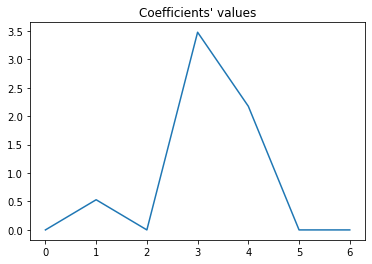

RMSE train: 23.770586692220583
RMSE test: 23.408794247573393


In [16]:
# Task

lr_en = ElasticNet(l1_ratio=0.5, alpha=1, positive=True, fit_intercept=False)
lr_en.fit(x_train_lasso, y_train)
plot_coef(lr_en.coef_)

y_hat_train = lr_en.predict(x_train_lasso)
y_hat_test = lr_en.predict(x_test_lasso)


rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)

print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

------------------------------------------------------------------------------------------------------------
Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)